# Make dataset from blobs

April 25, 2021

- Was not impressed with how the Titanic dataset would classify in K-means
- To move fast, I will create a fake dataset 
- In time, may want to make the data meaningul for the user 'wow'

In [13]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Make blobs

In [2]:
from sklearn.datasets import make_blobs

In [3]:
k = 3

In [4]:
arr = make_blobs(n_samples = 150, n_features = 2, centers = k)

#### There's effectively an x,y coordinate in arr[0]

In [6]:
arr[0].shape

(150, 2)

#### arr[1] is the cluster

In [7]:
arr[1].shape

(150,)

## 2. Look at it as a dataframe

In [15]:
df = pd.DataFrame(arr[0])

In [17]:
df[2] = arr[1]

In [19]:
df.head()

,0,1,2
0,1.498005,-5.211325,1
1,-9.774655,-2.128615,2
2,2.652464,-6.730050,0
3,-7.810276,0.508696,2
4,-0.611612,-6.661564,1


### 3. Plot clusters and iterate on random states

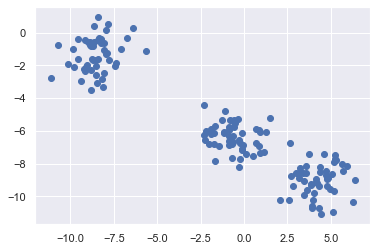

In [23]:
plt.scatter(df[0], df[1])

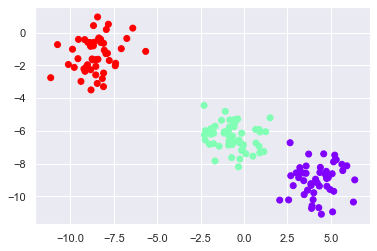

In [22]:
plt.scatter(df[0], df[1], c=df[2], cmap='rainbow')

### ^^ This is too distinct... need to adjust

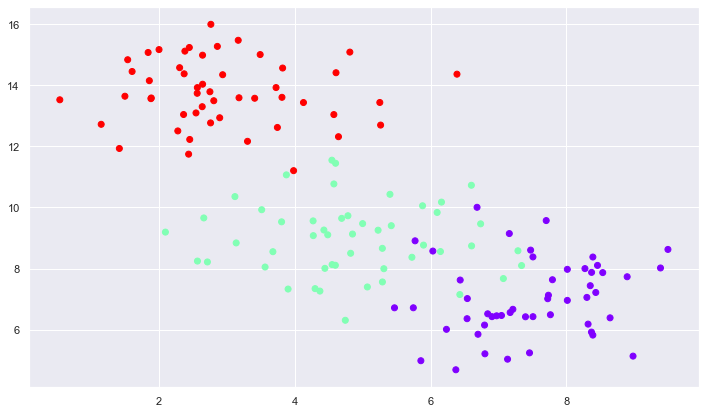

In [120]:
std = 1.2

arr = make_blobs(n_samples = 150, n_features = 2, centers = k, cluster_std = std, center_box = (3, 14), random_state = 54 )

a = arr[0][:,0]
b = arr[0][:,1]

fig = plt.figure(figsize=(12, 7))
plt.scatter(a, b, c=arr[1], cmap='rainbow')

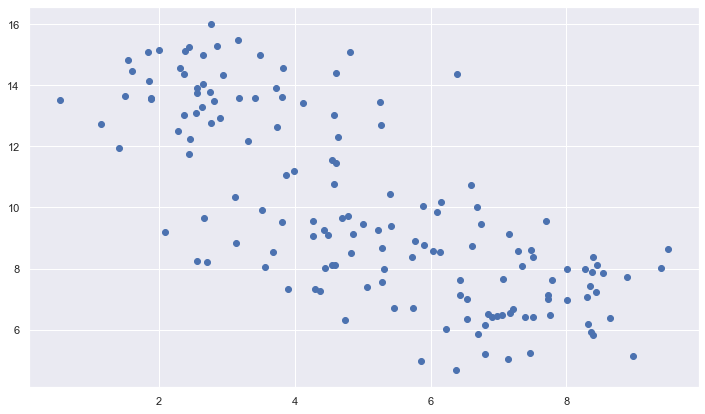

In [121]:
fig = plt.figure(figsize=(12, 7))
plt.scatter(a, b)

### ^^ This is what it will look like before clustering

***

## 4. Preprocess and save

### Process into a (150,3) nparray

In [122]:
arr3 = np.zeros((150,3))

arr3[:,:2] = arr[0][:,:2]

arr3[:5]

array([[ 3.11606553, 10.3564906 ,  0.        ],
       [ 3.72215619, 13.92455361,  0.        ],
       [ 8.01573808,  6.95961349,  0.        ],
       [ 2.76123171, 15.99434035,  0.        ],
       [ 6.16078187, 10.1760815 ,  0.        ]])

In [123]:
arr3[:,2] = arr[1]

arr3[:5]

array([[ 3.11606553, 10.3564906 ,  1.        ],
       [ 3.72215619, 13.92455361,  2.        ],
       [ 8.01573808,  6.95961349,  0.        ],
       [ 2.76123171, 15.99434035,  2.        ],
       [ 6.16078187, 10.1760815 ,  1.        ]])

### Look at as a df

In [124]:
df = pd.DataFrame(arr3)

df.describe()

,0,1,2
count,150.000000,150.000000,150.000000
mean,5.085623,9.917894,1.000000
std,2.186638,3.060754,0.819232
min,0.534696,4.688934,0.000000
25%,3.141840,7.471236,0.000000
50%,4.835350,9.138475,1.000000
75%,6.889370,13.014765,2.000000
max,9.498718,15.994340,2.000000


In [125]:
df[2].unique()

array([1., 2., 0.])

### Save nparray

In [127]:
np.save('../data/blobs1', arr3)

### Confirm save

In [128]:
arr = np.load('../data/blobs1.npy')

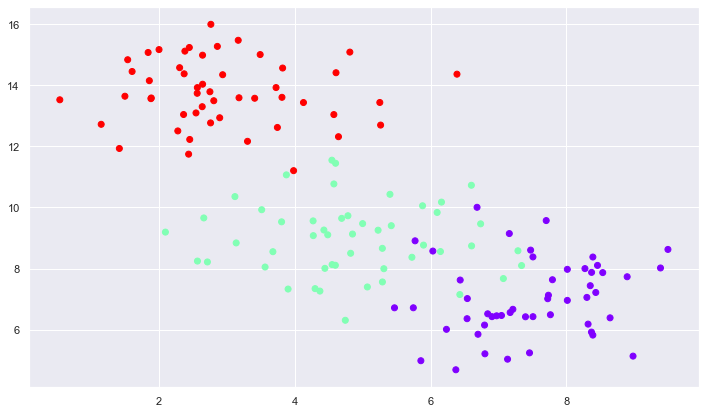

In [129]:
a = arr[:,0]
b = arr[:,1]

fig = plt.figure(figsize=(12, 7))
plt.scatter(a, b, c=arr[:,2], cmap='rainbow')